<a href="https://colab.research.google.com/github/rajenbala/dlaicourse/blob/master/DNN_Regression_Exam2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Dataset - Insurance Data
#https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

SyntaxError: ignored

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [4]:
insurance.info()
#Sex,smoker and region were objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
insuranceUpdated=pd.get_dummies(insurance)
insuranceUpdated.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [9]:
X=insuranceUpdated.drop("charges",axis=1)
y=insuranceUpdated['charges']

In [10]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [15]:
X_train

KeyError: ignored

In [37]:
# Model creation

tf.random.set_seed(33)

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(30,activation="relu",input_shape=(11,)),
                               tf.keras.layers.Dense(20,activation="relu",input_shape=(11,)), 
                               tf.keras.layers.Dense(1,activation="relu")
])

model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss="mae",metrics=("mae"))

model_1.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test))

Epoch 1/200
34/34 [==============================] - 1s 7ms/step - loss: 13751.0690 - mae: 13751.0690 - val_loss: 11869.5859 - val_mae: 11869.5859
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 11442.1979 - mae: 11442.1979 - val_loss: 7641.9253 - val_mae: 7641.9253
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 8036.8733 - mae: 8036.8733 - val_loss: 7537.1187 - val_mae: 7537.1187
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 7390.6499 - mae: 7390.6499 - val_loss: 7404.2446 - val_mae: 7404.2446
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 7333.6814 - mae: 7333.6814 - val_loss: 7236.5254 - val_mae: 7236.5254
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 7057.4650 - mae: 7057.4650 - val_loss: 7074.3955 - val_mae: 7074.3955
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 6794.6035 - mae: 6794.6035 - val_loss: 6911.8335 - val_mae: 691

In [31]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

In [38]:
model_1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 30)                360       
_________________________________________________________________
dense_30 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 21        
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


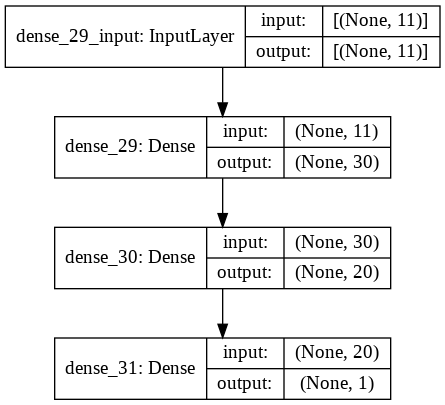

In [40]:
from tensorflow.keras.utils import plot_model

plot_model(model = model_1, show_shapes=True)

In [41]:
Y_pred=model_1.predict(X_test)
Y_pred[1]

array([5274.629], dtype=float32)

In [42]:
model_1.save("DNN_InsuranceModel.h5")

In [44]:
!ls DNN_InsuranceModel*

DNN_InsuranceModel.h5


In [45]:
reloadedModel= tf.keras.models.load_model("DNN_InsuranceModel.h5")
reloadedModel.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 30)                360       
_________________________________________________________________
dense_30 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 21        
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [46]:
savedModelPredict=reloadedModel.predict(X_test)
originalModelPredict = model_1.predict(X_test)

savedModelPredict,originalModelPredict, savedModelPredict==originalModelPredict

(array([[ 9116.758 ],
        [ 5274.629 ],
        [30754.332 ],
        [ 9312.441 ],
        [28240.201 ],
        [ 4523.1235],
        [ 2152.7468],
        [14153.429 ],
        [ 3821.436 ],
        [10348.127 ],
        [21040.834 ],
        [ 7349.7065],
        [ 3988.6929],
        [51238.32  ],
        [53193.832 ],
        [46525.07  ],
        [ 9892.928 ],
        [43580.71  ],
        [ 8274.664 ],
        [26081.186 ],
        [ 5177.3555],
        [ 7520.3716],
        [ 1269.5632],
        [ 2877.0208],
        [11203.543 ],
        [11019.149 ],
        [12681.385 ],
        [ 5275.0396],
        [ 9782.688 ],
        [ 1137.5802],
        [ 8362.507 ],
        [11931.094 ],
        [ 2132.9878],
        [ 5749.0347],
        [ 2961.1565],
        [ 7517.6343],
        [ 2668.0454],
        [ 7395.2305],
        [24520.809 ],
        [38182.508 ],
        [ 4713.0225],
        [ 2731.3606],
        [11722.66  ],
        [12166.259 ],
        [ 4806.9194],
        [1